path = "/home/jovyan/OneDrive/DESKTOP/amazon_reviews_us_Gift_Card_v1_00.tsv.gz"

In [2]:
import gzip


In [3]:
f = gzip.open(path, 'rt', encoding='utf8')

### Tasks - Regression 1.

In [4]:
dataset = []
header = f.readline().strip().split('\t')
for line in f:
    line = line.split('\t')
    d = dict(zip(header, line))
    d['star_rating'] = int(d['star_rating'])
    d2 = {}
    for field in ['star_rating']:
        d2[field] = d[field]
    dataset.append(d2)

In [5]:
header

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date']

In [6]:
rating_plot = []
for i in range(1,6):
    rating_plot.append(dataset.count({'star_rating': i}))
rating_plot

[4793, 1569, 3156, 9859, 129709]

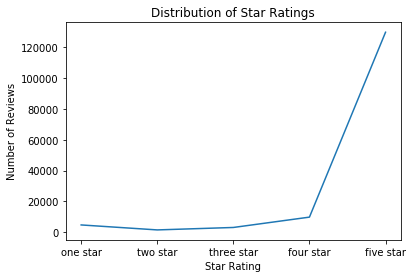

In [8]:
from matplotlib import pyplot as plt
Y = rating_plot
X = ['one star', 'two star', 'three star', 'four star', 'five star']
plt.ylabel('Number of Reviews')
plt.xlabel('Star Rating')
plt.title('Distribution of Star Ratings')
plt.plot(X,Y)

### Tasks - Regression 3.

In [9]:
import numpy as np
np.warnings.filterwarnings('ignore')

In [10]:
f1 = gzip.open(path, 'rt', encoding='utf8')

In [11]:
dataset1 = []
header1 = f1.readline().strip().split('\t')
for line1 in f1:
    line1 = line1.split('\t')
    d1 = dict(zip(header1, line1))
    d1['star_rating'] = int(d1['star_rating'])
    d1['review_body'] = len(d1['review_body'])
    d1['helpful_votes'] = int(d1['helpful_votes'])
    d3 = {}
    for field1 in ['star_rating', 'verified_purchase', 'review_body', 'helpful_votes']:
        d3[field1] = d1[field1]
    dataset1.append(d3)

In [12]:
dataset1[0]

{'star_rating': 5,
 'verified_purchase': 'Y',
 'review_body': 38,
 'helpful_votes': 0}

In [13]:
def feature(datum):
    return [1, datum['verified_purchase'] == 'Y', datum['review_body']]

In [14]:
x = [feature(d) for d in dataset1]
x[:10]

[[1, True, 38],
 [1, True, 101],
 [1, True, 4],
 [1, True, 4],
 [1, True, 76],
 [1, True, 94],
 [1, True, 8],
 [1, True, 26],
 [1, True, 13],
 [1, True, 37]]

In [15]:
y = [d['star_rating'] for d in dataset1]
y[:10]

[5, 5, 5, 1, 5, 5, 5, 5, 1, 5]

In [16]:
theta,residuals,rank,s = np.linalg.lstsq(x, y)
theta

array([ 4.84461817e+00,  5.04148265e-02, -1.24659895e-03])

##
theta 0：If the review is not verified and with no comment, the rating is likely to be 4.84.
##
theta 1: Holding review length constant, the average star ratings for verified review is 0.05 more than a non-verified review.
##
theta 2: Holding 'review is verified' variable constant, the 1 character increase of comment will averagely decrease 0.0012 average star ratings.  

### Tasks - Regression 4.

In [17]:
def feature1(datum):
    return [1, datum['verified_purchase'] == 'Y']

In [18]:
x1 = [feature1(d) for d in dataset1]
x1[:10]

[[1, True],
 [1, True],
 [1, True],
 [1, True],
 [1, True],
 [1, True],
 [1, True],
 [1, True],
 [1, True],
 [1, True]]

In [19]:
y1 = [float(d['star_rating']) for d in dataset1]
y1[:10]

[5.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 1.0, 5.0]

In [20]:
theta1,residuals,rank,s = np.linalg.lstsq(x1, y1)
theta1

array([4.57758356, 0.16852426])

##
The coefficient for verified purchase is much larger compared to the previous one. This change can be explained by the correlation between verified variable and review length. In the second regression, the verified purchase factor explains part of what review length explained in the first regression, causing the coefficient to change. 

### Tasks - Regression 5.

In [21]:
a = round(len(dataset1) * 0.9)
a

134177

In [22]:
dataset2 = dataset1[:a]
dataset3 = dataset1[a:]

In [23]:
def feature2(datum):
    feat = [1]
    if datum['verified_purchase'] == "Y":
        feat.append(1)
    else:
        feat.append(0)
    return feat

In [24]:
x2 = [feature2(d) for d in dataset2]
x2[:10]
x3 = [feature2(d) for d in dataset3]
x3[:10]

[[1, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 0],
 [1, 0],
 [1, 0]]

In [25]:
y2 = [float(d['star_rating']) for d in dataset2]
y3 = [float(d['star_rating']) for d in dataset3]

In [26]:
theta2,residuals,rank,s = np.linalg.lstsq(x2, y2)
theta2 = [float(t) for t in theta2]
theta2

[4.436571782178237, 0.31944365869311087]

In [27]:
def inner(x,y):
    return sum([a*b for (a,b) in zip(x,y)])

def derivative(X, Y, theta):
    mse_1 = []
    dtheta = [0.0]*len(theta) 
    K = len(theta)
    N = len(X)
    MSE = 0 
    for i in range(N):
        error = inner(X[i],theta) - Y[i]
        for k in range(K):
            dtheta[k] += 2*X[i][k]*error/N 
        MSE += error*error/N
    mse_1.append(dtheta)
    mse_1.append(MSE)
    
    return mse_1

In [28]:
mse_train = derivative(x2,y2,theta2)
mse_test = derivative(x3,y3,theta2)

print(mse_train[1])
print(mse_test[1])

0.6557415620280806
0.9713823241628805


##
MSE Training = 0.6557415620268976
##
MSE Testing = 0.9713823241631038


###Tasks - Regression 7.

In [29]:
x_new = [feature2(d) for d in dataset1]
y_new = y1

In [30]:
percentage = []
mse_training = []
mse_testing = []
N = len(dataset1)


for i in range(1,20):

    i = i*0.05
    x_train = x_new[:int(N*i)]
    y_train = y_new[:int(N*i)]
    x_test = x_new[int(N*i):]
    y_test = y_new[int(N*i):]
    
    theta_train,residuals,rank,s = np.linalg.lstsq(x_train,y_train)
    theta_train = [float(t) for t in theta_train]
    
    theta_test,residuals,rank,s = np.linalg.lstsq(x_test,y_test)
    theta_test = [float(t) for t in theta_test]
    
    mse_train = derivative(x_train,y_train,theta_train)
    mse_test = derivative(x_test,y_test,theta_test)
    
    mse_train = mse_train[1]
    mse_test = mse_test[1]

    
    percentage.append(int(i*100))
    mse_training.append(mse_train)
    mse_testing.append(mse_test)


In [32]:
import pandas as pd
dict = {'percentage':percentage, 'mse_training':mse_training, 'mse_testing':mse_testing}

df = pd.DataFrame(dict)
df.set_index('percentage', inplace=True)
df

,mse_training,mse_testing
percentage,,
5,0.700698,0.684402
10,0.726814,0.680118
15,0.682504,0.684665
20,0.620824,0.700199
25,0.596672,0.713448
30,0.588773,0.724731
35,0.595141,0.730666
40,0.588155,0.745999
45,0.574670,0.770323


Text(0.5, 1.0, 'Trend of MSE by Varying the Size of Training and Test Fractions ')

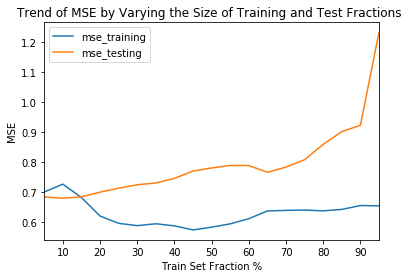

In [33]:
df.plot()
plt.xlabel('Train Set Fraction %')
plt.ylabel('MSE')
plt.title('Trend of MSE by Varying the Size of Training and Test Fractions ')

The size does not make a significant difference in testing performance unless the train set fraction is 90% or more. This may be explained by the low correlation between verified variable and star rating.

### Tasks - Classification 8.

In [34]:
def feature3(datum):
    return [1, float(datum['star_rating']), float(datum['review_body'])]

In [35]:
x4 = [feature3(d) for d in dataset2]
x4[:10]
x5 = [feature3(d) for d in dataset3]
x5[:10]

[[1, 5.0, 231.0],
 [1, 5.0, 152.0],
 [1, 5.0, 124.0],
 [1, 1.0, 209.0],
 [1, 5.0, 1278.0],
 [1, 5.0, 245.0],
 [1, 5.0, 246.0],
 [1, 5.0, 248.0],
 [1, 5.0, 144.0],
 [1, 5.0, 258.0]]

In [36]:
y4 = [d['verified_purchase' ] for d in dataset2]
y5 = [d['verified_purchase' ] for d in dataset3]

In [37]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(x4, y4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictionsTrain = model.predict(x4)
predictionsTest = model.predict(x5)
print(predictionsTrain)

['Y' 'Y' 'Y' ... 'Y' 'Y' 'Y']


In [39]:
correctPredictionsTrain = predictionsTrain == y4
correctPredictionsTest = predictionsTest == y5

Training accuracy: 




In [40]:
np.sum(correctPredictionsTrain) / len(correctPredictionsTrain)


0.9516161488183519

Test accuracy:



In [41]:
np.sum(correctPredictionsTest) / len(correctPredictionsTest)


0.5589241397813401

In [42]:
##### proportion of labels that are positive
p_lables = (y4.count('Y') + y5.count('Y'))/(len(y4)+len(y5))
p_lables

0.9125068752263794

In [44]:
##### proportion of predictions that are positive

a = list(predictionsTrain)
b = list(predictionsTest)

p_predict = (a.count('Y') + b.count('Y'))/(len(a) + len(b))
p_predict

0.9995975477241323

### Tasks - Classification 9.

In [45]:
def feature4(datum):
    return [1, datum['review_body'], datum['helpful_votes']]

X = [feature4(d) for d in dataset1]
X[:5]

[[1, 38, 0], [1, 101, 0], [1, 4, 0], [1, 4, 0], [1, 76, 0]]

In [46]:
Y = [d['verified_purchase' ] for d in dataset1]
Y[:5]

['Y', 'Y', 'Y', 'Y', 'Y']

In [47]:
e = round(len(dataset1)*0.9)
X_train = X[:e]
X_test = X[e:]
Y_train = Y[:e]
Y_test = Y[e:]

model.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predictionsTrain1 = model.predict(X_train)
predictionsTest1 = model.predict(X_test)


In [49]:
correctPredictionsTrain1 = predictionsTrain1 == Y_train
correctPredictionsTest1 = predictionsTest1 == Y_test
accuracy_train = np.sum(correctPredictionsTrain1) / len(correctPredictionsTrain1)
accuracy_test = np.sum(correctPredictionsTest1) / len(correctPredictionsTest1)
print(accuracy_train)
print(accuracy_test)

0.9515565260812211
0.5584546247233215


##My predictor is :
p(review is verified) ~ δ(theta0 + theta1 * ['review length'] + theta2*['helpful votes']
##
train accuracy is 0.9515565260812211

##
test accuracy is 0.5584546247233215

##
Both train and test accuracy are slightly lower than the previous predictor model. If we want to increase the accuracy, we could shuffle the dataset at the beginning. 

In [50]:
import random
random.shuffle(dataset1)

X1 = [feature4(d) for d in dataset1]
Y1 = [d['verified_purchase' ] for d in dataset1]
e1 = round(len(dataset1)*0.9)
X_train1 = X1[:e1]
X_test1 = X1[e1:]
Y_train1 = Y1[:e1]
Y_test1 = Y1[e1:]

model.fit(X_train1, Y_train1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictionsTrain2 = model.predict(X_train1)
predictionsTest2 = model.predict(X_test1)


In [52]:
correctPredictionsTrain2 = predictionsTrain2 == Y_train1
correctPredictionsTest2 = predictionsTest2 == Y_test1
accuracy_train1 = np.sum(correctPredictionsTrain2) / len(correctPredictionsTrain2)
accuracy_test1 = np.sum(correctPredictionsTest2) / len(correctPredictionsTest2)
print('train accuracy after shuffle is ' + str(accuracy_train1))
print('test accuracy after shuffle is ' + str(accuracy_test1))

train accuracy after shuffle is 0.9106627812516304
test accuracy after shuffle is 0.9122677577302301
